# SHAP prediction from Key Indicators using "statsmodels" package

In [14]:
import os
import pandas as pd
import numpy as np  # for NaN
import statsmodels.api as sm

In [2]:
from scipy.stats import pearsonr

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

### Import data

In [6]:
dir_files = '../data/organisational_audit/processed'
file_excel = 'processed_2019_portfolio_key_indicators_summary_numeric_shap.csv'

In [7]:
df = pd.read_csv(os.path.join(dir_files, file_excel))

In [8]:
df.columns

Index(['Hospital names', 'acute_unit', 'bed1', 'bed3', 'ki_total', 'ki1',
       'ki1_nurses6_wte', 'ki1_nurses7_wte', 'ki2', 'ki2_psych_wte', 'ki3',
       'ki3_strokenurse_outofhours', 'ki4',
       'ki4_minimum_nurse_bed1_saturdays10am',
       'ki4_minimum_nurse_bed1_sundays10am',
       'ki4_minimum_nurse_bed3_saturdays10am',
       'ki4_minimum_nurse_bed3_sundays10am', 'ki5',
       'ki5_occupationaltherapy_7days', 'ki5_physiotherapy_7days',
       'ki5_speechlanguagetherapy_7days', 'ki6', 'ki6_prealert_consultant',
       'ki6_prealert_fastpositive_sometimes', 'ki6_prealert_fastpositive_yes',
       'ki6_prealert_ivtcandidates_sometimes',
       'ki6_prealert_ivtcandidates_yes', 'ki6_prealert_juniordoctor',
       'ki6_prealert_othersuspectedstroke_sometimes',
       'ki6_prealert_othersuspectedstroke_yes', 'ki6_prealert_strokenurse',
       'ki7', 'ki7_percent_access_to_stroke_esd_team', 'ki7_stroke_esd_team',
       'ki8', 'ki8_patientcarersurvey_frequency_1to2peryear',
      

## Correlation

## Linear regression

In [18]:
x = df['ki_total'].values

In [19]:
y = df['shap_mean'].values

In [20]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.4325
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                       0.512
Time:                        09:00:09   Log-Likelihood:                         -78.105
No. Observations:                 116   AIC:                                      158.2
Df Residuals:                     115   BIC:                                      161.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

In [22]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [0.00561101]
R2:  0.0037466703341928476


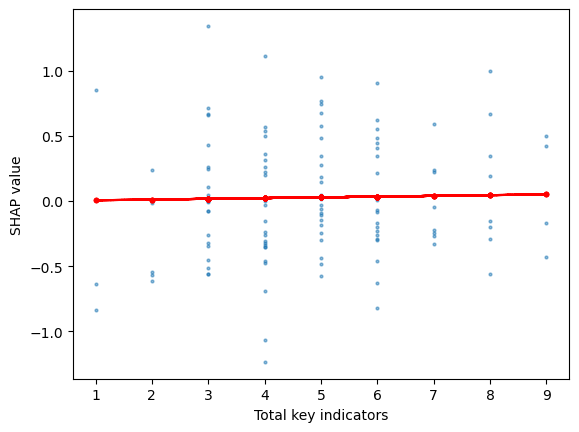

In [27]:
fig, ax = plt.subplots()

ax.scatter(x, y, s=4, alpha=0.5)
ax.plot(x, results.fittedvalues, "r--.", label="OLS")

ax.set_xlabel('Total key indicators')
ax.set_ylabel('SHAP value')

plt.show()